Import Pandas Library to import dataset & analyse dataset 

In [1]:
import pandas as pd

Import training & test data set

In [2]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

Analyse by fetching information for dataframe

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


View sample records

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe object columns of a dataframe

In [6]:
train_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lindell, Mr. Edvard Bengtsson",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Describe test data set to see how it differ from training dataset

In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test_df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Oreskovic, Miss. Jelka",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# Feature Engineering 

    1. Cabin  -- Analyse Cabin feature

In [9]:
train_df['Cabin_Start'] = train_df['Cabin'].str[0]

In [10]:
train_df[['Survived','Cabin_Start']].groupby(['Cabin_Start']).mean()

,Survived
Cabin_Start,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


In [11]:
pd.crosstab(train_df['Survived'],train_df['Cabin_Start'])

Cabin_Start,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,8,12,24,8,8,5,2,1
1,7,35,35,25,24,8,2,0


In [12]:
train_df[['Pclass','Cabin_Start']].groupby(['Cabin_Start']).mean()

,Pclass
Cabin_Start,
A,1.000000
B,1.000000
C,1.000000
D,1.121212
E,1.312500
F,2.384615
G,3.000000
T,1.000000


In [13]:
pd.crosstab(train_df['Pclass'],train_df['Cabin_Start'])

Cabin_Start,A,B,C,D,E,F,G,T
Pclass,,,,,,,,
1,15,47,59,29,25,0,0,1
2,0,0,0,4,4,8,0,0
3,0,0,0,0,3,5,4,0


In [14]:
train_df[['Fare','Cabin_Start']].groupby(['Cabin_Start']).mean()

,Fare
Cabin_Start,
A,39.623887
B,113.505764
C,100.151341
D,57.244576
E,46.026694
F,18.696792
G,13.581250
T,35.500000


In [16]:
combine = [train_df, test_df]

In [17]:
for dataset in combine:
    dataset['Cabin'].fillna('0', inplace=True)
    dataset.loc[ dataset['Cabin'].str[0] == 'A', 'Cabin'] = 1
    dataset.loc[ dataset['Cabin'].str[0] == 'B', 'Cabin'] = 2
    dataset.loc[ dataset['Cabin'].str[0] == 'C', 'Cabin'] = 3
    dataset.loc[ dataset['Cabin'].str[0] == 'D', 'Cabin'] = 4
    dataset.loc[ dataset['Cabin'].str[0] == 'E', 'Cabin'] = 5
    dataset.loc[ dataset['Cabin'].str[0] == 'F', 'Cabin'] = 6
    dataset.loc[ dataset['Cabin'].str[0] == 'G', 'Cabin'] = 7
    dataset.loc[ dataset['Cabin'].str[0] == 'T', 'Cabin'] = 8
    dataset['Cabin'] = dataset['Cabin'].astype(int)

In [18]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.776655
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.590899
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,8.000000


In [19]:
train_df.describe(include='O')

,Name,Sex,Ticket,Embarked,Cabin_Start
count,891,891,891,889,204
unique,891,2,681,3,8
top,"Lindell, Mr. Edvard Bengtsson",male,CA. 2343,S,C
freq,1,577,7,644,59


In [20]:
train_df = train_df.drop(["Cabin_Start"],axis=1)

    2. PassengerId  -- Drop PassengerID columns as it is just a counter

In [21]:
train_df = train_df.drop(["PassengerId"],axis=1)


    3. Ticket 
    
    Get Ticket length & check if length or alpha numeric ticket has any impact on survival chances

In [22]:
train_df["Ticket_Length"] = train_df["Ticket"].str.len()

In [23]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Length
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,9
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,C,8
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,16
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S,6
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,6


In [24]:
train_df["Ticket_Contains_Alpha"] = train_df["Ticket"].str.contains('^[a-zA-Z]')

In [25]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Length,Ticket_Contains_Alpha
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,9,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,C,8,True
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,16,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S,6,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,6,False


In [26]:
train_df[["Survived","Ticket_Length"]].groupby(['Ticket_Length'],as_index=False).mean()

,Ticket_Length,Survived
0,3,0.000000
1,4,0.366337
2,5,0.618321
3,6,0.319809
4,7,0.296296
5,8,0.539474
6,9,0.192308
7,10,0.341463
8,11,0.250000
9,12,0.400000


In [30]:
pd.crosstab(train_df['Survived'],train_df['Ticket_Length'])

Ticket_Length,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18
Survived,,,,,,,,,,,,,,,
0,2,64,50,285,19,35,21,27,6,6,6,6,8,8,6
1,0,37,81,134,8,41,5,14,2,4,4,3,3,6,0


In [31]:
train_df[["Survived","Ticket_Contains_Alpha"]].groupby(['Ticket_Contains_Alpha']).mean()

,Survived
Ticket_Contains_Alpha,
False,0.384266
True,0.382609


In [32]:
pd.crosstab(train_df['Survived'],train_df['Ticket_Contains_Alpha'])

Ticket_Contains_Alpha,False,True
Survived,,
0,407,142
1,254,88


In [33]:
train_df[["Survived","Ticket_Contains_Alpha","Ticket_Length"]].groupby(["Ticket_Contains_Alpha","Ticket_Length"]).mean()

Survived
Ticket_Contains_Alpha Ticket_Length          
False                 3              0.000000
                      4              0.371134
                      5              0.618321
                      6              0.320482
                      7              0.250000
True                  4              0.250000
                      6              0.250000
                      7              0.363636
                      8              0.539474
                      9              0.192308
                      10             0.341463
                      11             0.250000
                      12             0.400000
                      13             0.400000
                      15             0.333333
                      16             0.272727
                      17             0.428571
                      18             0.000000

    Ticket columns doesn't seem to impact much so drop it 

In [34]:
train_df = train_df.drop(["Ticket","Ticket_Length","Ticket_Contains_Alpha"],axis=1)
test_df = test_df.drop(["Ticket"],axis=1)

In [35]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,3,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,3,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S


    4. Pclass
    
    See how Pclass effect survival chances 

In [36]:
train_df[["Survived","Pclass"]].groupby(["Pclass"],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Only 3 unique values & with Pclass 1 with Surival chance of 63 % 

    5. Name
    
    See how Name effect survival chances
    
    First extract title

In [37]:
train_df["Name_Title"] = train_df["Name"].str.extract('([A-Za-z]+\.)',expand=False)

In [38]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,3,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,3,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S,Mr.


In [39]:
train_df["Name_Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [40]:
train_df[["Survived","Name_Title"]].groupby(["Name_Title"],as_index=False).mean()

,Name_Title,Survived
0,Capt.,0.000000
1,Col.,0.500000
2,Countess.,1.000000
3,Don.,0.000000
4,Dr.,0.428571
5,Jonkheer.,0.000000
6,Lady.,1.000000
7,Major.,0.500000
8,Master.,0.575000
9,Miss.,0.697802


Cross tabulation of Title field with Survived Columns

In [41]:
pd.crosstab(train_df["Survived"],train_df["Name_Title"])

Name_Title,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
Survived,,,,,,,,,,,,,,,,,
0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


Replace all rare gone cases with new type as gone 

In [42]:
train_df["Name_Title"] = train_df["Name_Title"].replace(['Capt.','Don.','Jonkheer.','Rev.'],'Gone.')

In [43]:
pd.crosstab(train_df["Survived"],train_df["Name_Title"])

Name_Title,Col.,Countess.,Dr.,Gone.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Sir.
Survived,,,,,,,,,,,,,,
0,1,0,4,9,0,1,17,55,0,0,436,26,0,0
1,1,1,3,0,1,1,23,127,2,1,81,99,1,1


Replace all rare survived cases with new type as Left

In [44]:
train_df["Name_Title"] = train_df["Name_Title"].replace(['Countess.','Lady.','Mlle.','Mme.','Ms.','Sir.'],'Left.')

In [45]:
pd.crosstab(train_df["Survived"],train_df["Name_Title"])

Name_Title,Col.,Dr.,Gone.,Left.,Major.,Master.,Miss.,Mr.,Mrs.
Survived,,,,,,,,,
0,1,4,9,0,1,17,55,436,26
1,1,3,0,7,1,23,127,81,99


Replace all rare cases with new type as Half

In [46]:
train_df["Name_Title"] = train_df["Name_Title"].replace(['Col.','Dr.','Major.'],'Half.')

In [47]:
pd.crosstab(train_df["Survived"],train_df["Name_Title"])

Name_Title,Gone.,Half.,Left.,Master.,Miss.,Mr.,Mrs.
Survived,,,,,,,
0,9,6,0,17,55,436,26
1,0,5,7,23,127,81,99


Do the same cleaning process for Test dataset

In [50]:
test_df["Name_Title"] = test_df["Name"].str.extract('([A-Za-z]+\.)',expand=False)
test_df["Name_Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Dona.'], dtype=object)

In [51]:
test_df["Name_Title"] = test_df["Name_Title"].replace(['Capt.','Don.','Jonkheer.','Rev.'],'Gone.')
test_df["Name_Title"] = test_df["Name_Title"].replace(['Col.','Dr.','Major.'],'Half.')

In [52]:
test_df["Name_Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Half.', 'Gone.',
       'Dona.'], dtype=object)

As dataset have some additional title use sex code to classify them

In [53]:
pd.crosstab(test_df["Name_Title"],test_df["Sex"])

Sex,female,male
Name_Title,,
Dona.,1,0
Gone.,0,2
Half.,0,3
Master.,0,21
Miss.,78,0
Mr.,0,240
Mrs.,72,0
Ms.,1,0


In [54]:
test_df["Name_Title"] = test_df["Name_Title"].replace(['Dona.','Ms.'],'Mrs.')

In [55]:
pd.crosstab(test_df["Sex"],test_df["Name_Title"])

Name_Title,Gone.,Half.,Master.,Miss.,Mr.,Mrs.
Sex,,,,,,
female,0,0,0,78,0,74
male,2,3,21,0,240,0


Do mapping of Name Title with numerical field

In [58]:
title_mapping = {"Mr.": 1, "Miss.": 2, "Mrs.": 3, "Master.": 4, "Gone.": 5, "Half.": 6, "Left.": 7}
train_df['Title_Encoded'] = train_df['Name_Title'].map(title_mapping)
train_df['Title_Encoded'] = train_df['Title_Encoded'].fillna(0)

In [59]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_Title,Title_Encoded
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S,Mr.,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,3,C,Mrs.,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S,Miss.,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,3,S,Mrs.,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S,Mr.,1


In [60]:
test_df['Title_Encoded'] = test_df['Name_Title'].map(title_mapping)
test_df['Title_Encoded'] = test_df['Title_Encoded'].fillna(0)

Drop existing Title columns

In [61]:
train_df = train_df.drop(["Name","Name_Title"],axis=1)
test_df = test_df.drop(["Name","Name_Title"],axis=1)

In [62]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
0,0,3,male,22.0,1,0,7.2500,0,S,1
1,1,1,female,38.0,1,0,71.2833,3,C,3
2,1,3,female,26.0,0,0,7.9250,0,S,2
3,1,1,female,35.0,1,0,53.1000,3,S,3
4,0,3,male,35.0,0,0,8.0500,0,S,1


In [63]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
0,892,3,male,34.5,0,0,7.8292,0,Q,1
1,893,3,female,47.0,1,0,7.0000,0,S,3
2,894,2,male,62.0,0,0,9.6875,0,Q,1
3,895,3,male,27.0,0,0,8.6625,0,S,1
4,896,3,female,22.0,1,1,12.2875,0,S,3


In [64]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Title_Encoded
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.776655,1.768799
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.590899,1.154557
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,8.000000,7.000000


In [65]:
train_df.describe(include='O')

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


    6. Sex

In [66]:
pd.crosstab(train_df["Survived"],train_df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [67]:
train_df[["Survived","Sex"]].groupby(["Sex"],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female have a higher probability of survival with 74%

In [68]:
train_df["Sex"] = train_df["Sex"].map({'female':1,'male':0}).astype(int)

In [69]:
test_df["Sex"] = test_df["Sex"].map({'female':1,'male':0}).astype(int)

In [70]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
0,0,3,0,22.0,1,0,7.2500,0,S,1
1,1,1,1,38.0,1,0,71.2833,3,C,3
2,1,3,1,26.0,0,0,7.9250,0,S,2
3,1,1,1,35.0,1,0,53.1000,3,S,3
4,0,3,0,35.0,0,0,8.0500,0,S,1
5,0,3,0,NaN,0,0,8.4583,0,Q,1
6,0,1,0,54.0,0,0,51.8625,5,S,1
7,0,3,0,2.0,3,1,21.0750,0,S,4
8,1,3,1,27.0,0,2,11.1333,0,S,3
9,1,2,1,14.0,1,0,30.0708,0,C,3


    7. Age 
       
    See how it impact survival  

In [71]:
pd.crosstab(train_df["Survived"],train_df["Age"])

Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,...,62.0,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


Age has missing values, compare it with other columns to see which can be used to generate missing values

In [72]:
train_df[["Survived","Age","Pclass"]].groupby(["Pclass"],as_index=False).mean()

,Pclass,Survived,Age
0,1,0.629630,38.233441
1,2,0.472826,29.877630
2,3,0.242363,25.140620


In [73]:
train_df[["Survived","Age","Pclass","Sex"]].groupby(["Pclass","Sex"],as_index=False).mean()

,Pclass,Sex,Survived,Age
0,1,0,0.368852,41.281386
1,1,1,0.968085,34.611765
2,2,0,0.157407,30.740707
3,2,1,0.921053,28.722973
4,3,0,0.135447,26.507589
5,3,1,0.500000,21.750000


In [74]:
train_df[["Survived","Age","Pclass","Sex","Title_Encoded"]].groupby(["Pclass","Sex","Title_Encoded"],as_index=False).mean()

,Pclass,Sex,Title_Encoded,Survived,Age
0,1,0,1,0.345794,41.580460
1,1,0,4,1.000000,5.306667
2,1,0,5,0.000000,49.333333
3,1,0,6,0.500000,48.428571
4,1,0,7,1.000000,49.000000
5,1,1,2,0.956522,30.000000
6,1,1,3,0.976190,40.882353
7,1,1,6,1.000000,49.000000
8,1,1,7,1.000000,30.600000
9,2,0,1,0.087912,32.768293


In [75]:
train_df[["Survived","Age","Sex","Title_Encoded"]].groupby(["Sex","Title_Encoded"],as_index=False).mean()

,Sex,Title_Encoded,Survived,Age
0,0,1,0.156673,32.368090
1,0,4,0.575000,4.574167
2,0,5,0.000000,45.222222
3,0,6,0.400000,46.222222
4,0,7,1.000000,49.000000
5,1,2,0.697802,21.773973
6,1,3,0.792000,35.898148
7,1,6,1.000000,49.000000
8,1,7,1.000000,30.166667


In [76]:
train_df[["Age","Title_Encoded"]].groupby(["Title_Encoded"],as_index=False).mean()

,Title_Encoded,Age
0,1,32.368090
1,2,21.773973
2,3,35.898148
3,4,4.574167
4,5,45.222222
5,6,46.500000
6,7,32.857143


Title Encoded makes more sense to use as it classify the person with master, mr which signify age level

In [77]:
train_df[["Age","Title_Encoded"]].groupby(["Title_Encoded"]).mean()

,Age
Title_Encoded,
1,32.368090
2,21.773973
3,35.898148
4,4.574167
5,45.222222
6,46.500000
7,32.857143


In [78]:
age_mapping = train_df[["Age","Title_Encoded"]].groupby(["Title_Encoded"]).mean().to_dict()

In [79]:
age_mapping

{'Age': {1: 32.368090452261306,
  2: 21.773972602739725,
  3: 35.898148148148145,
  4: 4.574166666666667,
  5: 45.22222222222222,
  6: 46.5,
  7: 32.857142857142854}}

In [80]:
age_mapping["Age"]

{1: 32.368090452261306,
 2: 21.773972602739725,
 3: 35.898148148148145,
 4: 4.574166666666667,
 5: 45.22222222222222,
 6: 46.5,
 7: 32.857142857142854}

In [81]:
train_df["Age"] = train_df["Age"].fillna(train_df["Title_Encoded"].map(age_mapping["Age"]))

In [82]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_Encoded
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.759709,0.523008,0.381594,32.204208,0.776655,1.768799
std,0.486592,0.836071,0.477990,13.282697,1.102743,0.806057,49.693429,1.590899,1.154557
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,21.773973,0.000000,0.000000,7.910400,0.000000,1.000000
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.898148,1.000000,0.000000,31.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,8.000000,7.000000


In [83]:
test_df["Age"] = test_df["Age"].fillna(test_df["Title_Encoded"].map(age_mapping["Age"]))

In [84]:
test_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_Encoded
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.175821,0.447368,0.392344,35.627188,0.717703,1.746411
std,120.810458,0.841838,0.481622,13.031379,0.896760,0.981429,55.907576,1.508321,1.023840
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,1.000000
50%,1100.500000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1204.750000,3.000000,1.000000,35.974537,1.000000,0.000000,31.500000,0.000000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,7.000000,6.000000


In [85]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
0,0,3,0,22.0,1,0,7.2500,0,S,1
1,1,1,1,38.0,1,0,71.2833,3,C,3
2,1,3,1,26.0,0,0,7.9250,0,S,2
3,1,1,1,35.0,1,0,53.1000,3,S,3
4,0,3,0,35.0,0,0,8.0500,0,S,1


Convert Age level vales in categorical numerical values

In [86]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.392670
2,"(32.252, 48.168]",0.320000
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [87]:
pd.crosstab(train_df["Survived"],train_df["AgeBand"])

AgeBand,"(0.34, 16.336]","(16.336, 32.252]","(32.252, 48.168]","(48.168, 64.084]","(64.084, 80.0]"
Survived,,,,,
0,47,232,221,39,10
1,57,150,104,30,1


In [88]:
combine = [train_df, test_df]

In [89]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
    dataset['Age'] = dataset['Age'].astype(int)

In [90]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded,AgeBand
0,0,3,0,1,1,0,7.2500,0,S,1,"(16.336, 32.252]"
1,1,1,1,2,1,0,71.2833,3,C,3,"(32.252, 48.168]"
2,1,3,1,1,0,0,7.9250,0,S,2,"(16.336, 32.252]"
3,1,1,1,2,1,0,53.1000,3,S,3,"(32.252, 48.168]"
4,0,3,0,2,0,0,8.0500,0,S,1,"(32.252, 48.168]"


In [91]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
0,892,3,0,2,0,0,7.8292,0,Q,1
1,893,3,1,2,1,0,7.0000,0,S,3
2,894,2,0,3,0,0,9.6875,0,Q,1
3,895,3,0,1,0,0,8.6625,0,S,1
4,896,3,1,1,1,1,12.2875,0,S,3


Drop AgeBand

In [92]:
train_df= train_df.drop(["AgeBand"],axis=1)

In [93]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
0,0,3,0,1,1,0,7.2500,0,S,1
1,1,1,1,2,1,0,71.2833,3,C,3
2,1,3,1,1,0,0,7.9250,0,S,2
3,1,1,1,2,1,0,53.1000,3,S,3
4,0,3,0,2,0,0,8.0500,0,S,1


    8. SibSp
    
    See how SibSp effect Survival

In [94]:
train_df[["Survived","SibSp"]].groupby(["SibSp"],as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [95]:
pd.crosstab(train_df["Survived"],train_df["SibSp"])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


    9. Parch
    
    See how Parch effect Survival

In [96]:
train_df[["Survived","Parch"]].groupby(["Parch"],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [97]:
pd.crosstab(train_df["Survived"],train_df["Parch"])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


    10. Fare
    
    See how Fare influence Survival

In [99]:
train_df["FareBand"] = pd.qcut(train_df["Fare"],10)
train_df[["Survived","FareBand"]].groupby(["FareBand"],as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.55]",0.141304
1,"(7.55, 7.854]",0.298851
2,"(7.854, 8.05]",0.179245
3,"(8.05, 10.5]",0.230769
4,"(10.5, 14.454]",0.428571
5,"(14.454, 21.679]",0.420455
6,"(21.679, 27.0]",0.516854
7,"(27.0, 39.688]",0.373626
8,"(39.688, 77.958]",0.528090
9,"(77.958, 512.329]",0.758621


In [100]:
pd.crosstab(train_df["Survived"],train_df["FareBand"])

FareBand,"(-0.001, 7.55]","(7.55, 7.854]","(7.854, 8.05]","(8.05, 10.5]","(10.5, 14.454]","(14.454, 21.679]","(21.679, 27.0]","(27.0, 39.688]","(39.688, 77.958]","(77.958, 512.329]"
Survived,,,,,,,,,,
0,79,61,87,60,48,51,43,57,42,21
1,13,26,19,18,36,37,46,34,47,66


Test dataset have missing vale for Fare, complete it before converting it in categorical values

In [101]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(),inplace=True)

In [102]:
test_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_Encoded
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,1.456938,0.447368,0.392344,35.576535,0.717703,1.746411
std,120.810458,0.841838,0.481622,0.798267,0.896760,0.981429,55.850103,1.508321,1.023840
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,1.000000,0.000000,0.000000,7.895800,0.000000,1.000000
50%,1100.500000,3.000000,0.000000,1.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1204.750000,3.000000,1.000000,2.000000,1.000000,0.000000,31.471875,0.000000,2.000000
max,1309.000000,3.000000,1.000000,4.000000,8.000000,9.000000,512.329200,7.000000,6.000000


In [103]:
combine = [train_df, test_df]

In [104]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.55, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.55) & (dataset['Fare'] <= 7.854), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 8.05), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 8.05) & (dataset['Fare'] <= 10.5), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 14.454), 'Fare']   = 4
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 21.679), 'Fare']   = 5
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 27), 'Fare']   = 6
    dataset.loc[(dataset['Fare'] > 27) & (dataset['Fare'] <= 39.688), 'Fare']   = 7
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 77.958), 'Fare']   = 8
    dataset.loc[ dataset['Fare'] > 77.958, 'Fare'] = 9
    dataset['Fare'] = dataset['Fare'].astype(int)

In [105]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded,FareBand
0,0,3,0,1,1,0,0,0,S,1,"(-0.001, 7.55]"
1,1,1,1,2,1,0,8,3,C,3,"(39.688, 77.958]"
2,1,3,1,1,0,0,2,0,S,2,"(7.854, 8.05]"
3,1,1,1,2,1,0,8,3,S,3,"(39.688, 77.958]"
4,0,3,0,2,0,0,2,0,S,1,"(7.854, 8.05]"


In [106]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
0,892,3,0,2,0,0,1,0,Q,1
1,893,3,1,2,1,0,0,0,S,3
2,894,2,0,3,0,0,3,0,Q,1
3,895,3,0,1,0,0,3,0,S,1
4,896,3,1,1,1,1,4,0,S,3


In [107]:
train_df = train_df.drop(["FareBand"],axis=1)

In [108]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
0,0,3,0,1,1,0,0,0,S,1
1,1,1,1,2,1,0,8,3,C,3
2,1,3,1,1,0,0,2,0,S,2
3,1,1,1,2,1,0,8,3,S,3
4,0,3,0,2,0,0,2,0,S,1


    11. Embarked
    
    See how Embarked vales effet survival chances

In [109]:
train_df[["Survived","Embarked"]].groupby(["Embarked"],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [110]:
pd.crosstab(train_df["Survived"],train_df["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [111]:
train_df.describe(include="O")

,Embarked
count,889
unique,3
top,S
freq,644


In [112]:
test_df.describe(include="O")

,Embarked
count,418
unique,3
top,S
freq,270


In [113]:
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].dropna().mode()[0])

In [114]:
train_df["Embarked"] = train_df["Embarked"].map({"C":0,"Q":1,"S":2}).astype(int)
test_df["Embarked"] = test_df["Embarked"].map({"C":0,"Q":1,"S":2}).astype(int)

In [115]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.439955,0.523008,0.381594,4.488215,0.776655,1.536476,1.768799
std,0.486592,0.836071,0.477990,0.842373,1.102743,0.806057,2.879339,1.590899,0.791503,1.154557
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,7.000000,0.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,9.000000,8.000000,2.000000,7.000000


In [116]:
test_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,1.456938,0.447368,0.392344,4.490431,0.717703,1.401914,1.746411
std,120.810458,0.841838,0.481622,0.798267,0.896760,0.981429,2.909697,1.508321,0.854496,1.023840
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
50%,1100.500000,3.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000
75%,1204.750000,3.000000,1.000000,2.000000,1.000000,0.000000,7.000000,0.000000,2.000000,2.000000
max,1309.000000,3.000000,1.000000,4.000000,8.000000,9.000000,9.000000,7.000000,2.000000,6.000000


In [117]:
X_train = train_df.drop(["Survived"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop(["PassengerId"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

Feature engineering completed now move to Model training

# Model Training
Import All required library

In [118]:
#from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import model_selection,metrics
from sklearn.metrics import confusion_matrix
import xgboost
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [119]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_train, Y_train,
                                                                    test_size=0.25,stratify=Y_train,random_state=0)

In [120]:
train_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Encoded
671,1,0,1,1,0,8,2,2,1
417,2,1,1,0,2,4,0,2,2
634,3,1,0,3,2,7,0,2,2
323,2,1,1,1,1,7,0,2,3
379,3,0,1,0,0,1,0,2,1


In [121]:
xgboost_model = xgboost.XGBClassifier(objective='binary:logistic',learning_rate=0.1)

In [122]:
eval_set = [(train_x,train_y),(valid_x,valid_y)]

In [123]:
xgboost_model.fit(train_x,train_y,eval_metric=['error','logloss','auc'],eval_set=eval_set,verbose=True)

[0]	validation_0-error:0.17515	validation_0-logloss:0.647875	validation_0-auc:0.863428	validation_1-error:0.224215	validation_1-logloss:0.65235	validation_1-auc:0.818579
[1]	validation_0-error:0.176647	validation_0-logloss:0.610655	validation_0-auc:0.868226	validation_1-error:0.219731	validation_1-logloss:0.620309	validation_1-auc:0.814505
[2]	validation_0-error:0.176647	validation_0-logloss:0.579603	validation_0-auc:0.872502	validation_1-error:0.237668	validation_1-logloss:0.592655	validation_1-auc:0.828085
[3]	validation_0-error:0.17515	validation_0-logloss:0.553554	validation_0-auc:0.872085	validation_1-error:0.224215	validation_1-logloss:0.571111	validation_1-auc:0.824308
[4]	validation_0-error:0.178144	validation_0-logloss:0.530674	validation_0-auc:0.884183	validation_1-error:0.233184	validation_1-logloss:0.552217	validation_1-auc:0.834324
[5]	validation_0-error:0.169162	validation_0-logloss:0.509347	validation_0-auc:0.886581	validation_1-error:0.233184	validation_1-logloss:0.5353

[48]	validation_0-error:0.149701	validation_0-logloss:0.349971	validation_0-auc:0.913849	validation_1-error:0.188341	validation_1-logloss:0.442069	validation_1-auc:0.850153
[49]	validation_0-error:0.149701	validation_0-logloss:0.349292	validation_0-auc:0.914086	validation_1-error:0.188341	validation_1-logloss:0.44175	validation_1-auc:0.850153
[50]	validation_0-error:0.146707	validation_0-logloss:0.348396	validation_0-auc:0.914371	validation_1-error:0.188341	validation_1-logloss:0.441435	validation_1-auc:0.850747
[51]	validation_0-error:0.143713	validation_0-logloss:0.347586	validation_0-auc:0.914456	validation_1-error:0.179372	validation_1-logloss:0.441681	validation_1-auc:0.850238
[52]	validation_0-error:0.142216	validation_0-logloss:0.346418	validation_0-auc:0.915243	validation_1-error:0.179372	validation_1-logloss:0.441231	validation_1-auc:0.851765
[53]	validation_0-error:0.143713	validation_0-logloss:0.345568	validation_0-auc:0.915916	validation_1-error:0.179372	validation_1-loglos

[96]	validation_0-error:0.134731	validation_0-logloss:0.324905	validation_0-auc:0.923795	validation_1-error:0.183857	validation_1-logloss:0.442649	validation_1-auc:0.851935
[97]	validation_0-error:0.136228	validation_0-logloss:0.324371	validation_0-auc:0.924373	validation_1-error:0.183857	validation_1-logloss:0.442087	validation_1-auc:0.853039
[98]	validation_0-error:0.136228	validation_0-logloss:0.323881	validation_0-auc:0.924762	validation_1-error:0.183857	validation_1-logloss:0.442498	validation_1-auc:0.853463
[99]	validation_0-error:0.136228	validation_0-logloss:0.32362	validation_0-auc:0.924866	validation_1-error:0.183857	validation_1-logloss:0.442966	validation_1-auc:0.853293


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [124]:
xgboost_model.score(train_x,train_y)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8637724550898204

In [125]:
pred_y = xgboost_model.predict(valid_x)
metrics.accuracy_score(valid_y,pred_y)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8161434977578476

In [126]:
pred_test = xgboost_model.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [127]:
submission = pd.DataFrame({"PassengerId":test_df["PassengerId"],"Survived":pred_test})

In [128]:
submission.to_csv('submission2.csv', index=False)

In [129]:
len(submission[submission.Survived ==1 ])

146

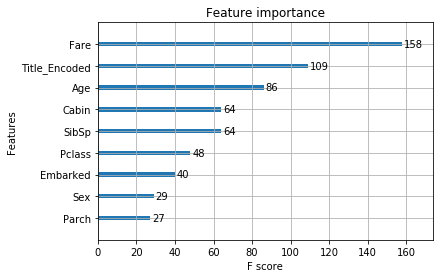

In [130]:
plot_importance(xgboost_model)
plt.show()

In [131]:
results = confusion_matrix(valid_y, pred_y) 
print(results)

[[127  10]
 [ 31  55]]


In [111]:
[[92  3]
 [31 53]]
[[129   8]
 [ 31  55]]
[[98 12]
 [24 45]]
[[128   9]
 [ 35  51]]
[[129   8]
 [ 32  54]]
[[127  10]
 [ 31  55]]

SyntaxError: invalid syntax (<ipython-input-111-0a3c8d3401a4>, line 1)